In [9]:
import quanguru as qg
import numpy as np
import matplotlib.pyplot as plt

# 14 - Time dependent Hamiltonian

In previous tutorials, the system Hamiltonians were time independent, and QuanGuru provides couple different methods to describe and simulate time-dependent Hamiltonians.
In this tutorial, we demonstrate one (probably the most convenient and flexible) of these time-dependent Hamiltonian methods.

Here, we use the below single qubit Hamiltonian,

$H=f_{z}J_{z} + f_{x}(t)\sigma_{x}$

where the second term will be time dependent.

In [10]:
qubFreq = 1
driveFreq = 2
driveAmp = 1
drivePhase = 0
couplingStrength = 1

OmegaR = couplingStrength*driveAmp
detun = qubFreq-driveFreq
Omega = np.sqrt((OmegaR**2) + (detun**2))

In [11]:
qub = qg.QuantumSystem(operator=qg.Jz)
qub.dimension = 2
qub.frequency = qubFreq

# add the drive terms 
secondTerm = qub.createTerm(operator=qg.sigmax)
secondTerm.frequency = driveFreq

qub.initialState = 1

qub.simTotalTime = 2*np.pi
qub.simStepSize = 0.01

# create the operators for which we compute the expectation values
sigmaX = qg.sigmax()

# write a compute function that takes two arguments: (i) a quantum-system (qsys) and (ii) a state
# compute whatever we want and store in .results
def compute(qsys, state):
    qsys.results['sigmax expectation'].append(qg.expectation(sigmaX, state))

# set the compute attribute of our qubit to compute function
qub.compute = compute

In [12]:
def secondTermTime(st, ti):
    st.frequency = couplingStrength*driveAmp*np.cos(2*np.pi*driveFreq*ti + drivePhase)

secondTerm.timeDependency = secondTermTime

In [13]:
states = qub.runSimulation()

In [14]:
qub._freeEvol.numberOfExponentiations, len(qub.simulation.timeList)

(1258, 630)

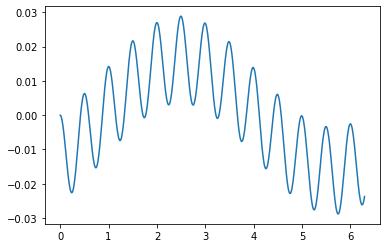

In [15]:
plt.plot(qub.simulation.timeList, qub.results['sigmax expectation'])